In [1]:
import os, json
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

In [2]:
error_rate_list = ["0", "0.00001", "0.0001", "0.001", "0.01", "0.1"]

power_timeseries_acc_list = []
energy_acc_list = []
mean_power_acc_list = []
duration_acc_list = []
for error_rate in error_rate_list:
    filepath = os.path.join(os.getcwd(), "data", "accuracy", f"error_rate_{error_rate}.json")
    with open(filepath, "r") as f:
        accuracy = json.load(f)["accuracy"]
        power_timeseries_acc_list.append(accuracy["power_timeseries"])
        energy_acc_list.append(accuracy["energy"])
        mean_power_acc_list.append(accuracy["mean_power"])
        duration_acc_list.append(accuracy["duration"])

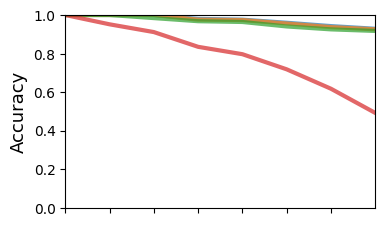

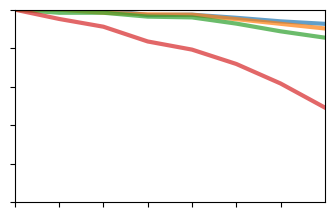

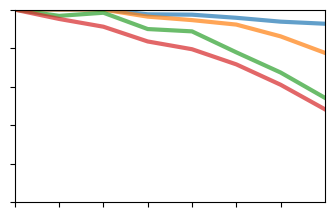

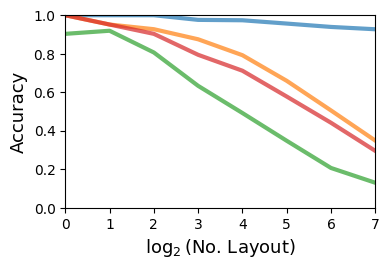

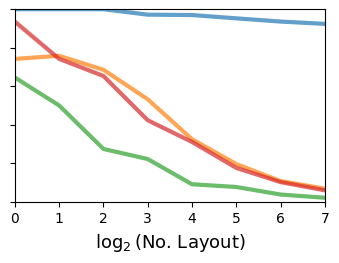

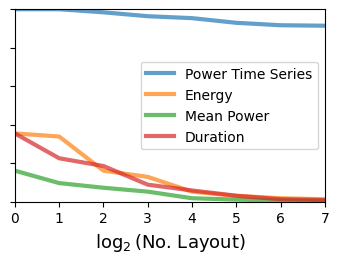

In [3]:
linewidth = 3
alpha = 0.7

for error_rate_idx, error_rate in enumerate(error_rate_list):
    plt.figure(figsize=(4, 2.5), dpi=100)
    plt.plot(range(len(power_timeseries_acc_list[error_rate_idx])), power_timeseries_acc_list[error_rate_idx], label="Power Time Series", linewidth=linewidth, alpha=alpha)
    plt.plot(range(len(energy_acc_list[error_rate_idx])), energy_acc_list[error_rate_idx], label="Energy", linewidth=linewidth, alpha=alpha)
    plt.plot(range(len(mean_power_acc_list[error_rate_idx])), mean_power_acc_list[error_rate_idx], label="Mean Power", linewidth=linewidth, alpha=alpha)
    plt.plot(range(len(duration_acc_list[error_rate_idx])), duration_acc_list[error_rate_idx], label="Duration", linewidth=linewidth, alpha=alpha)

    plt.xlim((0, 7))
    plt.ylim((0, 1))
    if error_rate_idx > 2:
        plt.xlabel(r"$\log_{2}$(No. Layout)", fontsize=13)
    else:
        plt.xticks(range(7), [])
    if error_rate_idx % 3 == 0:
        plt.ylabel("Accuracy", fontsize=13)
    else:
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], [])
    
    # plt.tight_layout()
    if error_rate_idx == 5:
        plt.legend()

    plt.savefig(f"../../paper/figure/user_circuit_identification/error_rate_{error_rate}.pdf")

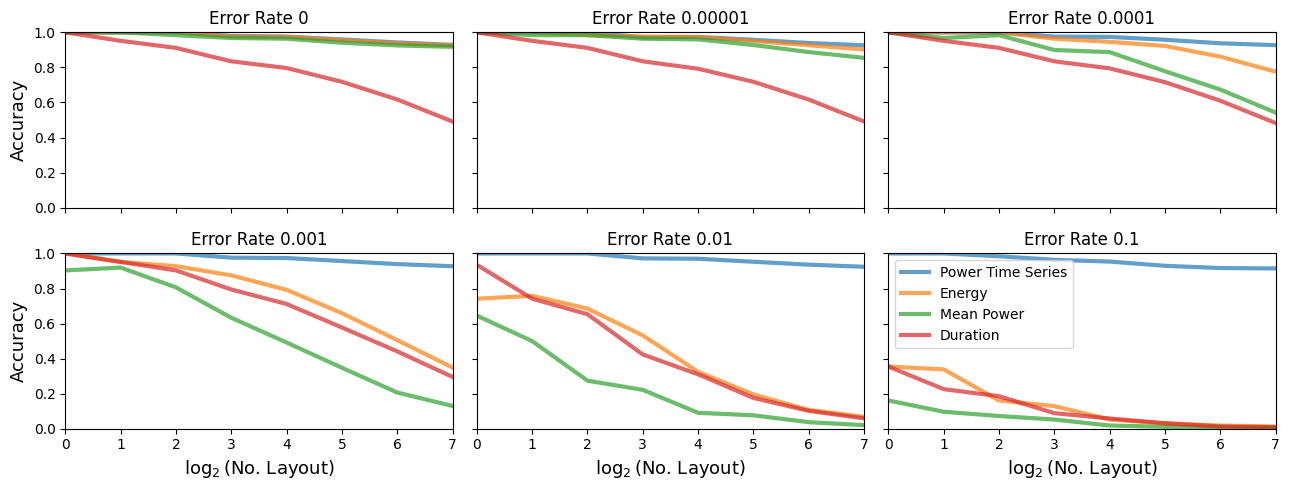

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 5), dpi=100, sharex=True, sharey=True)

for i in range(3):
    axes[1][i].set_xlabel(r"$\log_{2}$(No. Layout)", fontsize=13)
for i in range(2):
    axes[i][0].set_ylabel("Accuracy", fontsize=13)

axes = axes.flatten()

linewidth = 3
alpha = 0.7

for error_rate_idx, error_rate in enumerate(error_rate_list):
    axes[error_rate_idx].plot(range(len(power_timeseries_acc_list[error_rate_idx])), power_timeseries_acc_list[error_rate_idx], label="Power Time Series", linewidth=linewidth, alpha=alpha)
    axes[error_rate_idx].plot(range(len(energy_acc_list[error_rate_idx])), energy_acc_list[error_rate_idx], label="Energy", linewidth=linewidth, alpha=alpha)
    axes[error_rate_idx].plot(range(len(mean_power_acc_list[error_rate_idx])), mean_power_acc_list[error_rate_idx], label="Mean Power", linewidth=linewidth, alpha=alpha)
    axes[error_rate_idx].plot(range(len(duration_acc_list[error_rate_idx])), duration_acc_list[error_rate_idx], label="Duration", linewidth=linewidth, alpha=alpha)

    axes[error_rate_idx].set_xlim((0, 7))
    axes[error_rate_idx].set_ylim((0, 1))
    axes[error_rate_idx].set_title(f"Error Rate {error_rate}", )

    
    # plt.tight_layout()
plt.legend()
plt.tight_layout()
# plt.savefig(f"../../paper/figure/user_circuit_identification/error_rate.pdf")